In [3]:
using Plots, FFTW, Images, ImageIO, FileIO, FFTViews

In [ ]:
function dislocate(image)
    image_double = zeros(Float64, 674, 674)
    for i in 1:674
        for j in 1:674
            image_double[i, j] = Float64(image[i, j])
            image_double[i, j] = image_double[i, j] * (-1)^(i+j)
        end
    end
    return image_double
end

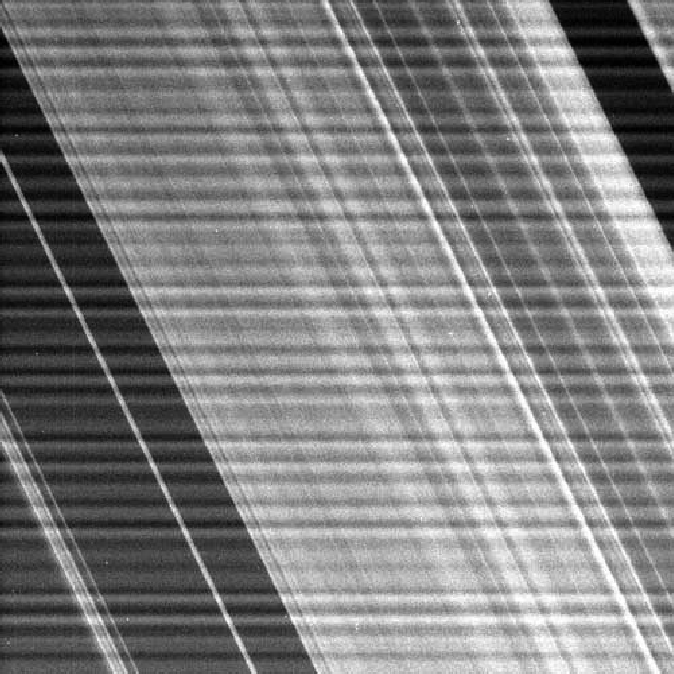

In [4]:
img = load("C:/Users/meies/Documents/Poli/EPs_Vitor/21_11/cassini-interference.tif")

In [15]:
print(size(img))

img_double = zeros(Float64, 674, 674)

for i in 1:674
    for j in 1:674
        img_double[i, j] = Float64(img[i, j])
        img_double[i, j] = img_double[i, j] * (-1)^(i+j)
    end
end

img_double

(674, 674)

674×674 Matrix{Float64}:
  0.211765  -0.211765   0.352941  …  -0.45098    0.411765  -0.411765
 -0.211765   0.211765  -0.352941      0.45098   -0.411765   0.411765
  0.243137  -0.243137   0.352941     -0.478431   0.454902  -0.454902
 -0.317647   0.317647  -0.352941      0.529412  -0.513725   0.513725
  0.423529  -0.423529   0.345098     -0.572549   0.556863  -0.556863
 -0.423529   0.423529  -0.345098  …   0.572549  -0.556863   0.556863
  0.509804  -0.509804   0.345098     -0.560784   0.552941  -0.552941
 -0.517647   0.517647  -0.364706      0.505882  -0.517647   0.517647
  0.45098   -0.45098    0.4          -0.470588   0.490196  -0.490196
 -0.45098    0.45098   -0.4           0.470588  -0.490196   0.490196
  ⋮                               ⋱                        
 -0.282353   0.282353  -0.294118  …   0.670588  -0.721569   0.721569
  0.282353  -0.282353   0.294118     -0.670588   0.721569  -0.721569
 -0.278431   0.278431  -0.309804      0.690196  -0.678431   0.678431
  0.258824  -0.258